### Assignment 1 ###

Perform a basic statistical analysis of the time DOT 311 (table is called dot_311) complaints are open (subtract closed date from created date)
Connect to the database to get the data and do the analysis. Submit the code through Github and type up your results in your PR

Host: training.c1erymiua9dx.us-east-1.rds.amazonaws.com
Port: 5432
Database: training
Username: dot_student
Password: qgis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser
import pg8000
from pandas import DataFrame


In [2]:
conn = pg8000.connect(host="training.c1erymiua9dx.us-east-1.rds.amazonaws.com", user='dot_student', password='qgis', database='training')
cursor = conn.cursor()

In [3]:
cursor.execute("select column_name from information_schema.columns where table_name='dot_311'")
column_list = []
for row in cursor.fetchall():
    column_list.append(row[0])
column_list

['gid',
 'unique_key',
 'agency',
 'agency nam',
 'complaint',
 'descriptor',
 'location t',
 'incident z',
 'incident a',
 'street nam',
 'cross stre',
 'cross st_1',
 'intersecti',
 'intersec_1',
 'address ty',
 'city',
 'landmark',
 'facility t',
 'status',
 'due date',
 'resolution',
 'resoluti_1',
 'community',
 'borough',
 'x coordina',
 'y coordina',
 'park facil',
 'park borou',
 'school nam',
 'school num',
 'school reg',
 'school cod',
 'school pho',
 'school add',
 'school cit',
 'school sta',
 'school zip',
 'school not',
 'school or',
 'vehicle ty',
 'taxi compa',
 'taxi pick',
 'bridge hig',
 'bridge h_1',
 'road ramp',
 'bridge h_2',
 'garage lot',
 'ferry dire',
 'ferry term',
 'latitude',
 'longitude',
 'location',
 'geom',
 'created_date',
 'closed_date']

In [4]:
response = "select * from dot_311"

In [5]:
cursor.execute("select * from dot_311")
output = []
for row in cursor.fetchall():
    output.append(row)


In [6]:
df = pd.DataFrame(data=output, columns=column_list)

In [7]:
df.head(3)

,gid,unique_key,agency,agency nam,complaint,descriptor,location t,incident z,incident a,street nam,...,bridge h_2,garage lot,ferry dire,ferry term,latitude,longitude,location,geom,created_date,closed_date
0,2,32570549,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,10301,None,None,...,None,None,None,None,40.613803753157917,-74.113373738864198,"(40.61380375315792, -74.1133737388642)",0101000020E61000006829ED83418752C0D7FC121F914E...,2016-02-01 00:12:00,2016-02-01 01:15:00
1,3,32572958,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,10301,None,None,...,None,None,None,None,40.626545297464929,-74.091582334480577,"(40.62654529746493, -74.09158233448058)",0101000020E610000011DF267CDC8552C08809E5A23250...,2016-02-01 00:14:00,2016-02-01 00:54:00
2,4,32573576,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,10310,None,None,...,None,None,None,None,40.629249554787492,-74.123220752604595,"(40.62924955478749, -74.1232207526046)",0101000020E610000004A84BD9E28752C0DC6AD93F8B50...,2016-02-01 00:15:00,2016-02-01 01:30:00


In [8]:
sel_df = df[[
 'unique_key',
 'agency',
 'agency nam',
 'created_date',
 'closed_date',                  
 'complaint',
 'descriptor',
 'status',
 'due date',
 'resolution',
 'city',
 'borough'
 ]]

In [9]:
sel_df.head(3)

,unique_key,agency,agency nam,created_date,closed_date,complaint,descriptor,status,due date,resolution,city,borough
0,32570549,DOT,Department of Transportation,2016-02-01 00:12:00,2016-02-01 01:15:00,Traffic Signal Condition,Controller,Closed,None,None,STATEN ISLAND,STATEN ISLAND
1,32572958,DOT,Department of Transportation,2016-02-01 00:14:00,2016-02-01 00:54:00,Traffic Signal Condition,Controller,Closed,None,None,STATEN ISLAND,STATEN ISLAND
2,32573576,DOT,Department of Transportation,2016-02-01 00:15:00,2016-02-01 01:30:00,Traffic Signal Condition,Controller,Closed,None,None,STATEN ISLAND,STATEN ISLAND


In [10]:
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 12 columns):
unique_key      5851 non-null object
agency          5851 non-null object
agency nam      5851 non-null object
created_date    5851 non-null datetime64[ns]
closed_date     5650 non-null datetime64[ns]
complaint       5851 non-null object
descriptor      5851 non-null object
status          5851 non-null object
due date        1464 non-null object
resolution      1657 non-null object
city            4405 non-null object
borough         5851 non-null object
dtypes: datetime64[ns](2), object(10)
memory usage: 320.0+ KB


In [78]:
#dateutil.parser.parse("2016-02-01 00:15:00")

In [60]:
sel_df['ClosedDate'] = pd.to_datetime(sel_df['closed_date'], format='%m/%d/%y %H:%M:%S')
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 15 columns):
unique_key      5851 non-null object
agency          5851 non-null object
agency nam      5851 non-null object
created_date    5851 non-null datetime64[ns]
closed_date     5650 non-null datetime64[ns]
complaint       5851 non-null object
descriptor      5851 non-null object
status          5851 non-null object
due date        1464 non-null object
resolution      1657 non-null object
city            4405 non-null object
borough         5851 non-null object
delay           4547 non-null timedelta64[ns]
CreatedDate     5851 non-null datetime64[ns]
ClosedDate      5650 non-null datetime64[ns]
dtypes: datetime64[ns](4), object(10), timedelta64[ns](1)
memory usage: 457.1+ KB


c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
#no need to do this step as created date and closed date are already in datetime format
sel_df['CreatedDate'] = pd.to_datetime(sel_df['created_date'], format='%m/%d/%y %H:%M:%S')
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 14 columns):
unique_key      5851 non-null object
agency          5851 non-null object
agency nam      5851 non-null object
created_date    5851 non-null datetime64[ns]
closed_date     5650 non-null datetime64[ns]
complaint       5851 non-null object
descriptor      5851 non-null object
status          5851 non-null object
due date        1464 non-null object
resolution      1657 non-null object
city            4405 non-null object
borough         5851 non-null object
delay           4547 non-null timedelta64[ns]
CreatedDate     5851 non-null datetime64[ns]
dtypes: datetime64[ns](3), object(10), timedelta64[ns](1)
memory usage: 411.4+ KB


c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
#def parse_date(str_date):
    #return dateutil.parser.parse(str_date)

#df['Created Date'] = df['created_date'].apply(parse_date)

In [79]:
sel_df['delay'] = sel_df['ClosedDate'] - sel_df['CreatedDate']
sel_df['delay'].head(3)

c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0   01:03:00
1   00:40:00
2   01:15:00
Name: delay, dtype: timedelta64[ns]

In [64]:
delay.isnull().value_counts()

False    5650
True      201
dtype: int64

In [65]:
delay_delta = pd.DataFrame(sel_df['delay'][sel_df['delay']> pd.Timedelta(seconds=0)].dropna())
delay_delta.describe()

,delay
count,4547
mean,8 days 16:15:03.514405
std,15 days 10:48:08.619990
min,0 days 00:00:01
25%,0 days 12:41:58
50%,1 days 03:33:17
75%,6 days 00:30:23.500000
max,89 days 18:54:00


In [83]:
delay_delta.head()

,delay
0,01:03:00
1,00:40:00
2,01:15:00
3,02:18:00
4,00:41:00


In [66]:
#now all the null values have been removed. great ! now i can test with a dataframe.
delay_delta['delay'].isnull().value_counts()

False    4547
Name: delay, dtype: int64

In [69]:
#changing the delta value to seconds so that we can plot easily
delay_delta['delay'].astype('timedelta64[s]')

0          3780.0
1          2400.0
2          4500.0
3          8280.0
4          2460.0
5          5940.0
6          4080.0
7          2280.0
8           600.0
9         79064.0
10        72257.0
11       647100.0
12       807600.0
13         1200.0
15        46080.0
16       229211.0
17       384240.0
18       291660.0
19       127980.0
20        30684.0
21       652680.0
22       293646.0
23        25019.0
24       128160.0
25        29160.0
26        37140.0
27       196620.0
28         1380.0
29        22058.0
30       172860.0
          ...    
5820     399642.0
5821     234949.0
5822     103530.0
5823     103461.0
5824     133140.0
5825     221700.0
5826     102863.0
5827     144266.0
5828    3326640.0
5829     385320.0
5830    1683057.0
5831      75858.0
5832     491444.0
5833    1336495.0
5834     901668.0
5835     105235.0
5836     139013.0
5837     131280.0
5838     175423.0
5839     816145.0
5840     168240.0
5841      15660.0
5842      63071.0
5843      72298.0
5844     1

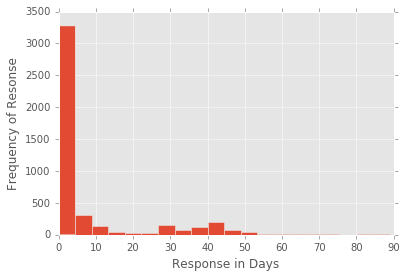

In [90]:
# plotting time delata in days bucket
delay_delta['delay'].astype('timedelta64[D]').hist(bins=20)
plt.xlabel('Response in Days')
plt.ylabel('Frequency of Resonse')

In [ ]:
delay_delta['delay'].astype('timedelta64[D]').hist(bins=20)

In [21]:
delay_delta['delay'].head()

0   01:03:00
1   00:40:00
2   01:15:00
3   02:18:00
4   00:41:00
Name: delay, dtype: timedelta64[ns]

In [84]:
# Now checking the original dataframe sel_df. it has 201 null values which i have to remove.
#sel_df['delay'].isnull().value_counts()

In [85]:
# Don't assign a dataframe to a column after dropping rows because if you append to the original dataframe, the index wont match.
#sel_df['delay'] = pd.DataFrame(sel_df['delay'][sel_df['delay']> pd.Timedelta(seconds=0)].dropna())
#sel_df['delay'].describe()

In [86]:
#pd.DataFrame(sel_df['delay'][sel_df['delay']> pd.Timedelta(seconds=0)])['delay']

In [80]:
#sel_df['delay']

In [81]:
#sel_df['delay'].isnull().value_counts()

In [82]:
sel_df.head(3)

,unique_key,agency,agency nam,created_date,closed_date,complaint,descriptor,status,due date,resolution,city,borough,delay,CreatedDate,ClosedDate
0,32570549,DOT,Department of Transportation,2016-02-01 00:12:00,2016-02-01 01:15:00,Traffic Signal Condition,Controller,Closed,None,None,STATEN ISLAND,STATEN ISLAND,01:03:00,2016-02-01 00:12:00,2016-02-01 01:15:00
1,32572958,DOT,Department of Transportation,2016-02-01 00:14:00,2016-02-01 00:54:00,Traffic Signal Condition,Controller,Closed,None,None,STATEN ISLAND,STATEN ISLAND,00:40:00,2016-02-01 00:14:00,2016-02-01 00:54:00
2,32573576,DOT,Department of Transportation,2016-02-01 00:15:00,2016-02-01 01:30:00,Traffic Signal Condition,Controller,Closed,None,None,STATEN ISLAND,STATEN ISLAND,01:15:00,2016-02-01 00:15:00,2016-02-01 01:30:00


In [87]:
delay_delta['delay'].head()

0   01:03:00
1   00:40:00
2   01:15:00
3   02:18:00
4   00:41:00
Name: delay, dtype: timedelta64[ns]

In [88]:
delay_delta['delay'].value_counts().head()

00:20:00    23
01:32:00    10
01:26:00    10
02:02:00     9
00:25:00     9
Name: delay, dtype: int64

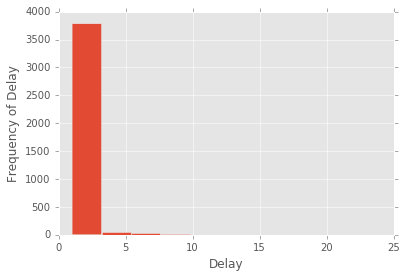

In [27]:

delay_delta['delay'].value_counts().hist()
plt.xlabel('Delay')
plt.ylabel('Frequency of Delay')

In [89]:
delay_plot = pd.DataFrame(delay_delta['delay'].value_counts())
delay_plot.head()

,delay
00:20:00,23
01:32:00,10
01:26:00,10
02:02:00,9
00:25:00,9


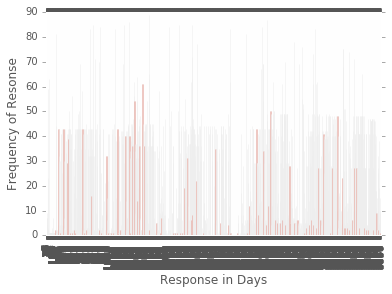

In [93]:

delay_delta['delay'].astype('timedelta64[D]').plot(kind='bar',x=delay_plot.index, y ='delay')
plt.xlabel('Response in Days')
plt.ylabel('Frequency of Resonse')

In [100]:
delay_delta['delay'].describe()

count                       4547
mean      8 days 16:15:03.514405
std      15 days 10:48:08.619990
min              0 days 00:00:01
25%              0 days 12:41:58
50%              1 days 03:33:17
75%       6 days 00:30:23.500000
max             89 days 18:54:00
Name: delay, dtype: object

In [30]:
delay_plot.quantile(q=0.25)

delay    1.0
dtype: float64

In [31]:
delay_plot.quantile(q=0.5)

delay    1.0
dtype: float64

In [32]:
delay_plot.quantile(q=0.75)

delay    1.0
dtype: float64